# Phase4: Project Development
## Introduction:
Project development involves creating a probabilistic model that accurately represents the connection between independent and dependent variables. For this phase, you will construct multiple machine learning models based on your problem statement. This will include using the Cross-Industry Standard Process for Data Mining (CRISP-DM) methodology which provides a structured approach for developing machine learning models.
The main goal of this phase is to create an efficient prediction model that automates the task and provides valuable insights based on a given dataset.

## Names: Jorge Leon Gomez - Juan Felipe Rivera Cortes
## SAIT ID: 000958077 - 000952824





## Bussiness Understanding

### Model:
The problem of underdeveloped Carbon Capture, Utilization, and Storage (CCUS) technologies limits their effectiveness in mitigating climate change. Additionally, carbon offsets, while widely adopted, face scrutiny over their standards, techniques, and overall impact.
This affects companies in heavy industries, governments, regulatory bodies, environmental agencies, investors in carbon markets, and society at large, particularly in regions highly affected by climate change.
For companies, the uncertainty in CCUS and carbon offset standards raises the risk of non-compliance and financial losses. Governments and regulatory bodies struggle to implement consistent, effective policies. 
For companies, a detailed evaluation of CCUS and carbon credit feasibility will enable them to adopt technologies that meet their decarbonization goals cost-effectively. Governments can use the findings to shape more accurate and enforceable climate policies. 
Investors would gain more confidence in the carbon markets, leading to increased
funding for CCUS projects. Society would benefit from a clearer, more actionable path toward reducing carbon emissions, which is essential to mitigate climate change impacts

### Objectives:
Implement an AI solution that establishes a frame work to enhance carbon capture in oil and gas process.
1. Optimal quantification - properly quantize the carbon footprint from an oil production.
2. Machine Learning-based optimization of carbon capture systems - Build a model that captures carbon in the most efficient way.
3. Predictive modelling of CO2 storage potential - Build a model that predicts the quantity of carbon to be stored.
4. Optimal carbon storage reservoir management - Deals with the many obstacles of carbon storage to effectively store and make available stored carbon.
5. AI reutilization (Sell it to another end users downstream on the chain) - The transfer of the stored carbon for reuse.
6. Trade Carbon Credits - Platform to trade and buy carbon credits.

## Data Collection and Data Undestanding:

i.	Collect the data from data sources specified in the design phase.
 
Carbon Capture, Utilization, and Storage (CCUS) initiatives are crucial in mitigating CO2 emissions from industrial processes and promoting environmental sustainability. Within the petroleum industry, enhanced oil recovery (EOR) is a significant application of CCUS. Injecting captured CO2 into oil reservoirs not only helps sequester CO2 but also enhances oil recovery through processes like miscible gas injection. However, achieving optimal results requires an accurate determination of the minimum miscible pressure (MMP) for CO2 and reservoir oil.
 
Our dataset encompasses a plethora of information, ranging from gas compositions to thermodynamic properties and MMP measurements. Prior to model construction, data preprocessing is imperative. Missing values are handled, ensuring data completeness.

Link: https://www.sciencedirect.com/science/article/pii/S0016236122040182?via%3Dihub


In [40]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFECV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error

# Step 1: Load the dataset (replace 'MMP.csv' with your actual file)
data = pd.read_csv('../Capstone/dataset_upstream.csv')

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   No.            193 non-null    float64
 1   G_N2           193 non-null    float64
 2   G_CO2          193 non-null    float64
 3   G_H2S          193 non-null    float64
 4   G_C1           193 non-null    float64
 5   G_C2           193 non-null    float64
 6   G_C3           193 non-null    float64
 7   G_C4           193 non-null    float64
 8   G_C5           193 non-null    float64
 9   G_C6           193 non-null    float64
 10  G_C7+          193 non-null    float64
 11  TR (℃)         193 non-null    float64
 12  O_N2           193 non-null    float64
 13  O_CO2          193 non-null    float64
 14  O_C1           193 non-null    float64
 15  O_C2           193 non-null    float64
 16  O_C3           193 non-null    float64
 17  O_C4           193 non-null    float64
 18  O_C5      

## Observations
- We see that the data is complete but we will need to clean up the names of the columns
- All are dependent variables exept MMP which is the target variable.
  

In [42]:
data.columns = ["No","G_N2", "G_CO2", "G_H2S", "G_C1", "G_C2", "G_C3", "G_C4", "G_C5","G_C6","G_C7+", "TR(C)","O_N2", "O_CO2", "O_C1", "O_C2", "O_C3", "O_C4", "O_C5", "O_C6", "O_C7+","MWC7+(g/mol)","EM","MMP (mPa)","test1"]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   No            193 non-null    float64
 1   G_N2          193 non-null    float64
 2   G_CO2         193 non-null    float64
 3   G_H2S         193 non-null    float64
 4   G_C1          193 non-null    float64
 5   G_C2          193 non-null    float64
 6   G_C3          193 non-null    float64
 7   G_C4          193 non-null    float64
 8   G_C5          193 non-null    float64
 9   G_C6          193 non-null    float64
 10  G_C7+         193 non-null    float64
 11  TR(C)         193 non-null    float64
 12  O_N2          193 non-null    float64
 13  O_CO2         193 non-null    float64
 14  O_C1          193 non-null    float64
 15  O_C2          193 non-null    float64
 16  O_C3          193 non-null    float64
 17  O_C4          193 non-null    float64
 18  O_C5          193 non-null    

# Data Preparation

ii Analyze (perform EDA) the dataset using both visual and non-visual representation (data types, descriptive statistics, missing values, data distribution, outliers, etc.).
 
One of the key parameters for reservoir planning is the minimum miscible pressure (MMP), particularly for miscible gas injection techniques used in enhanced oil recovery (EOR).
 
This case study adopts a data-driven approach to predict MMP by analyzing key reservoir and fluid properties using a random forest regression model. This model allows petroleum engineers to integrate predictive analytics into reservoir planning, enabling more informed decision-making. By leveraging this approach, operators can reduce reliance on traditional experimental methods and improve reservoir management practices, positioning themselves for both operational success and alignment with sustainable energy goals.
 

In [43]:
# Assuming the data has features (input variables) and a target column 'MMP

data.drop(columns=["No","test1"], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   G_N2          193 non-null    float64
 1   G_CO2         193 non-null    float64
 2   G_H2S         193 non-null    float64
 3   G_C1          193 non-null    float64
 4   G_C2          193 non-null    float64
 5   G_C3          193 non-null    float64
 6   G_C4          193 non-null    float64
 7   G_C5          193 non-null    float64
 8   G_C6          193 non-null    float64
 9   G_C7+         193 non-null    float64
 10  TR(C)         193 non-null    float64
 11  O_N2          193 non-null    float64
 12  O_CO2         193 non-null    float64
 13  O_C1          193 non-null    float64
 14  O_C2          193 non-null    float64
 15  O_C3          193 non-null    float64
 16  O_C4          193 non-null    float64
 17  O_C5          193 non-null    float64
 18  O_C6          193 non-null    

In [44]:
data1 = data.dropna(subset=data.columns)
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, 0 to 192
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   G_N2          193 non-null    float64
 1   G_CO2         193 non-null    float64
 2   G_H2S         193 non-null    float64
 3   G_C1          193 non-null    float64
 4   G_C2          193 non-null    float64
 5   G_C3          193 non-null    float64
 6   G_C4          193 non-null    float64
 7   G_C5          193 non-null    float64
 8   G_C6          193 non-null    float64
 9   G_C7+         193 non-null    float64
 10  TR(C)         193 non-null    float64
 11  O_N2          193 non-null    float64
 12  O_CO2         193 non-null    float64
 13  O_C1          193 non-null    float64
 14  O_C2          193 non-null    float64
 15  O_C3          193 non-null    float64
 16  O_C4          193 non-null    float64
 17  O_C5          193 non-null    float64
 18  O_C6          193 non-null    float

i.	Wrangle the data (handle missing values, anomalies, etc.).

array([[<Axes: title={'center': 'G_N2'}>,
        <Axes: title={'center': 'G_CO2'}>,
        <Axes: title={'center': 'G_H2S'}>,
        <Axes: title={'center': 'G_C1'}>,
        <Axes: title={'center': 'G_C2'}>],
       [<Axes: title={'center': 'G_C3'}>,
        <Axes: title={'center': 'G_C4'}>,
        <Axes: title={'center': 'G_C5'}>,
        <Axes: title={'center': 'G_C6'}>,
        <Axes: title={'center': 'G_C7+'}>],
       [<Axes: title={'center': 'TR(C)'}>,
        <Axes: title={'center': 'O_N2'}>,
        <Axes: title={'center': 'O_CO2'}>,
        <Axes: title={'center': 'O_C1'}>,
        <Axes: title={'center': 'O_C2'}>],
       [<Axes: title={'center': 'O_C3'}>,
        <Axes: title={'center': 'O_C4'}>,
        <Axes: title={'center': 'O_C5'}>,
        <Axes: title={'center': 'O_C6'}>,
        <Axes: title={'center': 'O_C7+'}>],
       [<Axes: title={'center': 'MWC7+(g/mol)'}>,
        <Axes: title={'center': 'EM'}>,
        <Axes: title={'center': 'MMP (mPa)'}>, <Axes: >, <Ax

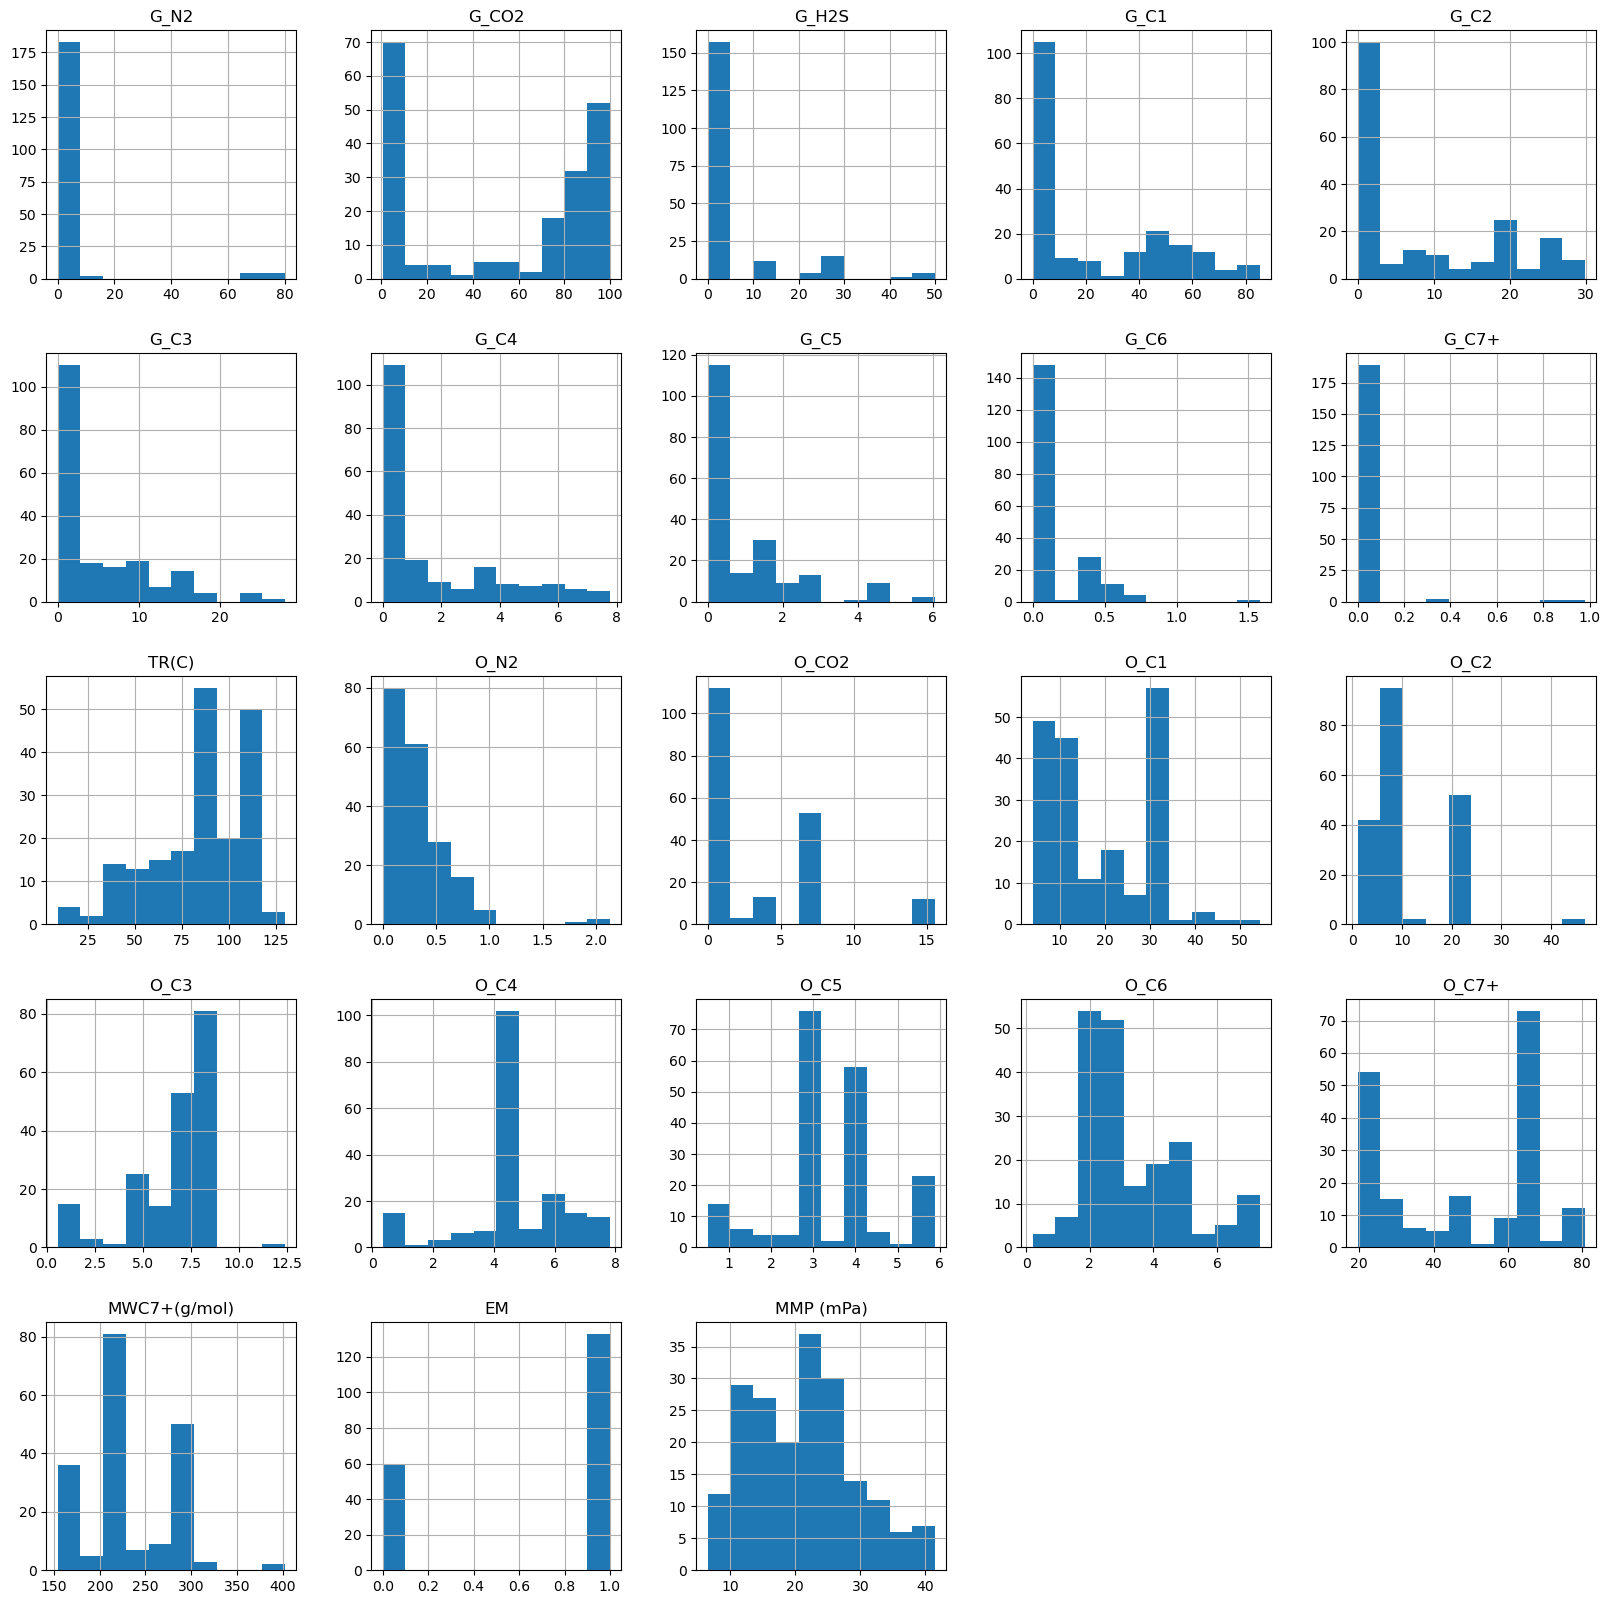

In [45]:
data1.hist(figsize=(20, 20))

Analyze (perform EDA).

 
# iii.	Define the dependent variable and independent variables.
 
To differentiate the injection gas composition and the component in reservoir oil, we employed “G_” for injected gas and “O_” for the reservoir oil as initials of the features’ names.
 
- 193 CO2-MMP measurements, test methods.
- CO2 and oil component percentages.
- Slim-tube or RBA test distinction.
- C7+ molecular weight, reservoir temperature.
- Collinearity minimized, CO2 excluded input.




# Dependent variable:

- CO2 and other phase componets:
- G_N2          193 non-null    float64
- G_CO2         193 non-null    float64
- G_H2S         193 non-null    float64

- TR(C)         193 non-null    float64
- O_N2          193 non-null    float64

- Hydrocarbon composition of injected gas:
- G_C1          193 non-null    float64
- G_C2          193 non-null    float64
- G_C3          193 non-null    float64
- G_C4          193 non-null    float64
- G_C5          193 non-null    float64
- G_C6          193 non-null    float64
- G_C7+         193 non-null    float64


- Hydrocarbon composition of reservoir oil.
- O_CO2         193 non-null    float64
- O_C1          193 non-null    float64
- O_C2          193 non-null    float64
- O_C3          193 non-null    float64
- O_C4          193 non-null    float64
- O_C5          193 non-null    float64
- O_C6          193 non-null    float64
- O_C7+         193 non-null    float64

- C7+ molecular weight, reservoir temperature.
- MWC7+(g/mol)  193 non-null    float64
- EM            193 non-null    float64

# Independent variables:

- Minimum visibilty pressure:

- MMP (mPa)     193 non-null    float64


In [46]:
# Assuming the data has features (input variables) and a target column 'MMP'
# Ensure target variable is numeric
y = pd.to_numeric(data1["MMP (mPa)"], errors='coerce')

# Handle any categorical variables in X
X = pd.get_dummies(data1.drop("MMP (mPa)", axis=1), drop_first=True)



ii.	Perform feature engineering (e.g., categorical to numeric conversions, normalizations, standardization, etc.).


 

In [47]:
# Step3: Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
 
 



# Feature scaling: 
- Standardization is applied to the input features to ensure that each feature contributes equally to the model’s performance.
 

In [48]:
# Feature seleciton using RFE with Cross-validation
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
rfecv = RFECV(estimator=model_rf, step=1, cv=5, scoring='neg_mean_squared_error')
rfecv.fit(X_scaled, y)

RFECV(cv=5, estimator=RandomForestRegressor(random_state=42),
      scoring='neg_mean_squared_error')

# Feature selection: 
- Feature selection serves as a critical step in optimizing the model’s predictive prowess. Recursive feature elimination with cross-validation (RFECV) is employed for automatic feature selection, enabling the identification of the most influential features for MMP prediction

In [49]:

#Get the selected features and their ranking
selected_features = X.columns[rfecv.support_]
print("Selected Features:")
print(selected_features)

print(X.columns)

#selected features:
index= ['G_N2', 'G_CO2', 'G_H2S', 'G_C1', 'G_C2', 'G_C3', 'G_C4', 'G_C5',
       'G_C6', 'G_C7+', 'TR(C)', 'O_N2', 'O_CO2', 'O_C1', 'O_C2', 'O_C3',
       'O_C4', 'O_C5', 'O_C6', 'O_C7+', 'MWC7+(g/mol)', 'EM']


Selected Features:
Index(['G_N2', 'G_CO2', 'G_H2S', 'G_C1', 'G_C2', 'G_C3', 'G_C4', 'G_C5',
       'G_C7+', 'TR(C)', 'O_N2', 'O_CO2', 'O_C1', 'O_C2', 'O_C3', 'O_C4',
       'O_C6', 'O_C7+', 'MWC7+(g/mol)'],
      dtype='object')
Index(['G_N2', 'G_CO2', 'G_H2S', 'G_C1', 'G_C2', 'G_C3', 'G_C4', 'G_C5',
       'G_C6', 'G_C7+', 'TR(C)', 'O_N2', 'O_CO2', 'O_C1', 'O_C2', 'O_C3',
       'O_C4', 'O_C5', 'O_C6', 'O_C7+', 'MWC7+(g/mol)', 'EM'],
      dtype='object')


iv.	Split the data into training and test set.


array([[<Axes: title={'center': 'G_N2'}>,
        <Axes: title={'center': 'G_CO2'}>,
        <Axes: title={'center': 'G_H2S'}>,
        <Axes: title={'center': 'G_C1'}>,
        <Axes: title={'center': 'G_C2'}>],
       [<Axes: title={'center': 'G_C3'}>,
        <Axes: title={'center': 'G_C4'}>,
        <Axes: title={'center': 'G_C5'}>,
        <Axes: title={'center': 'G_C6'}>,
        <Axes: title={'center': 'G_C7+'}>],
       [<Axes: title={'center': 'TR(C)'}>,
        <Axes: title={'center': 'O_N2'}>,
        <Axes: title={'center': 'O_CO2'}>,
        <Axes: title={'center': 'O_C1'}>,
        <Axes: title={'center': 'O_C2'}>],
       [<Axes: title={'center': 'O_C3'}>,
        <Axes: title={'center': 'O_C4'}>,
        <Axes: title={'center': 'O_C5'}>,
        <Axes: title={'center': 'O_C6'}>,
        <Axes: title={'center': 'O_C7+'}>],
       [<Axes: title={'center': 'MWC7+(g/mol)'}>,
        <Axes: title={'center': 'EM'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

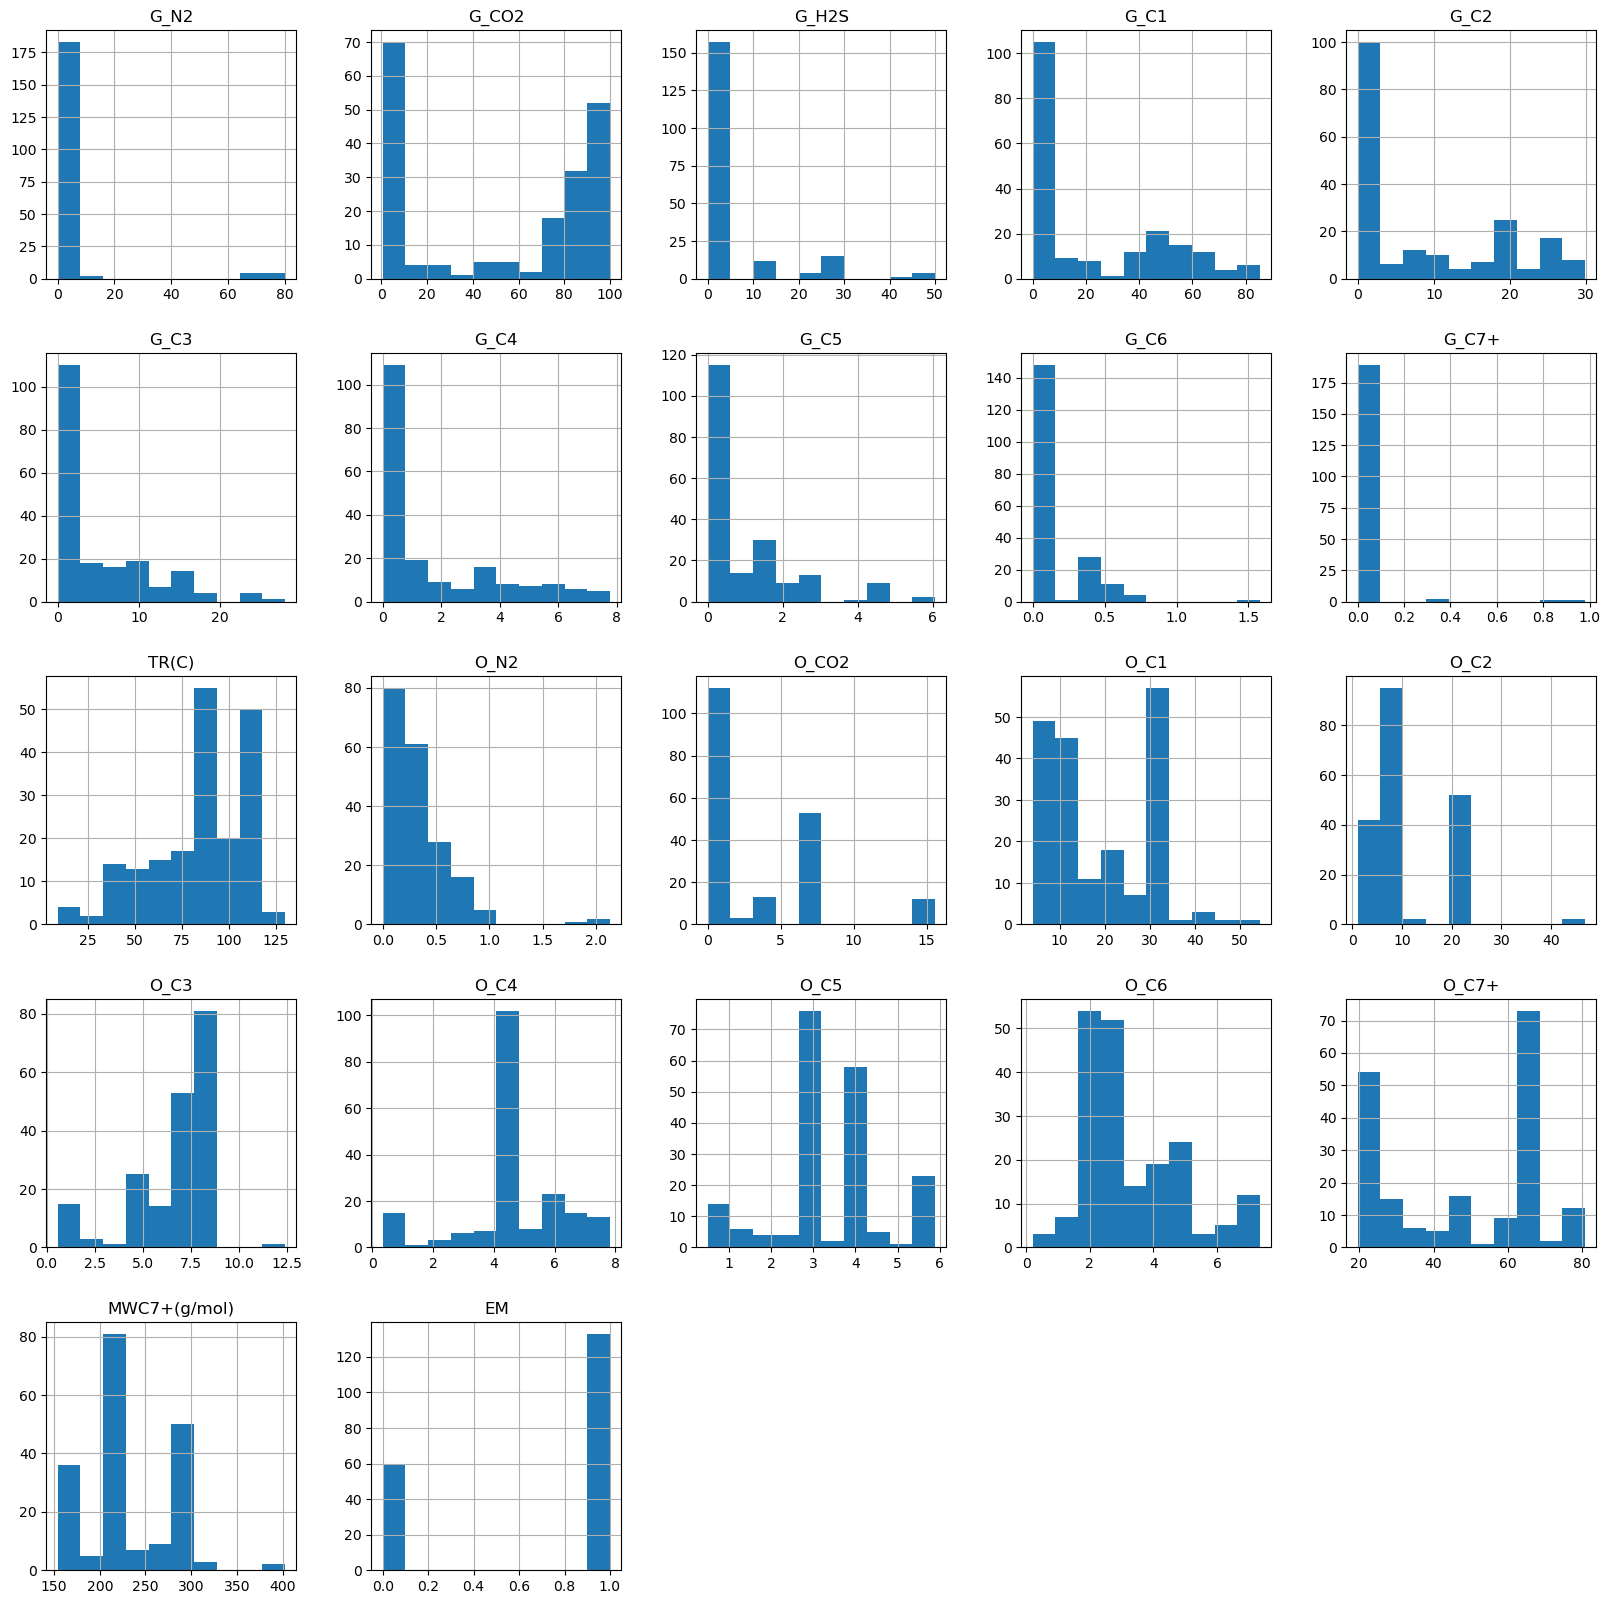

In [50]:
X.hist(figsize=(20, 20))

Analyze (perform EDA) the dataset again after the cleaning and feature engineering operations.

# Model Building


i.	Select the appropriate machine learning algorithms (e.g., classification, regression, clustering, NLP, CV).
The essence of our methodology lies in model training and hyperparameter tuning. The random forest regression model is employed, known for its ability to capture intricate relationships in data.

In [51]:
#Step 5 model training and cross validation with hyperparameter tuning
 
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
 
 
 

ii.	Use the training dataset to train the model.
The random forest regressor is trained on the selected features. Hyperparameters are fine-tuned using RandomizedSearchCV, a technique to find the best combination of hyperparameters for optimal model performance.

In [52]:
model_rf_tuned = RandomForestRegressor(random_state=42)
rf_random = RandomizedSearchCV(estimator=model_rf_tuned, param_distributions=param_dist, n_iter=50, cv=5, scoring="neg_mean_squared_error", verbose=1, random_state=42)
rf_random.fit(X_scaled, y)
 
 
print("Best Hyperparameters:")
print(rf_random.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters:
{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 5}


# Model Evaluation

i.	Use the test dataset to perform model evaluation.
 
 
ii.	Use appropriate evaluation criteria to check the performance of the model (e.g., Accuracy, RMSE, etc.).
The trained model’s efficacy is evaluated through diverse metrics encompassing mean squared error (MSE), mean absolute error (MAE), and the R2 score. These metrics quantify the model's predictive accuracy and its ability to explain the variance in MMP.

In [53]:
# Step 6: Model Evaluation on Testing Set
X_selected = rfecv.transform(X_scaled)
#print(X_selected.columns
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
 
model_rf_tuned_best = RandomForestRegressor(**rf_random.best_params_, random_state=42)
model_rf_tuned_best.fit(X_train, y_train)
y_test_pred = model_rf_tuned_best.predict(X_test)
 
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
 
print(f"Mean Squared Error (MSE) on Test Set: {mse_test}")
print(f"Mean Absolute Error (MAE) on Test Set: {mae_test}")
print(f"R-squared (R2) Score on Test Set: {r2_test}")

Mean Squared Error (MSE) on Test Set: 9.226371750061169
Mean Absolute Error (MAE) on Test Set: 1.8457726534943624
R-squared (R2) Score on Test Set: 0.8296700598170104


iii.	Perform hyperparameter tuning (if required) to improve performance.
A custom Taylor Diagram implementation is used to visually compare the correlation and standard deviations between actual and predicted MMP values.
 

In [54]:
#step 7: Taylor Daigram
def plot_taylor_diagram(y_true, y_pred, title):
  corr_coef = np.corrcoef(y_true, y_pred)[0, 1]
  std_obs = np.std(y_true)
  std_model = np.std(y_pred)
 
  plt.figure(figsize=(8, 8))
  plt.scatter(std_obs, corr_coef, color="b", marker="o", label="Model")
  plt.plot([0, std_obs], [corr_coef, corr_coef], "b--", label="Correlation")
  plt.plot([std_obs, std_obs], [0, corr_coef], "b--")
  plt.plot([0, std_obs], [0, corr_coef], "b--")
 
  plt.scatter(std_model, corr_coef, color="r", marker="o", label="Observations")
  plt.plot([0, std_model], [corr_coef, corr_coef], "r--", label="Correlation")
  plt.plot([std_model, std_model], [0, corr_coef], "r--")
  plt.plot([0, std_model], [0, corr_coef], "r--")
 
 
 
  plt.xlabel("Standard Deviation of Observations")
  plt.ylabel("Correlation Coefficient")
  plt.title(title)
  plt.legend()
  plt.grid(True)
  plt.show()





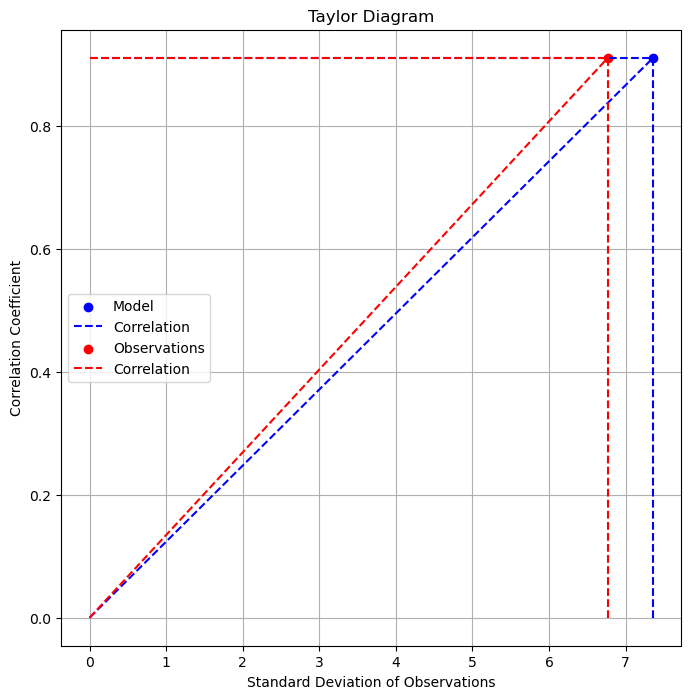

In [55]:

# Step 3: Make predictions
predictions = model_rf_tuned_best.predict(X_test)

# Step 4: Plot the Taylor diagram
plot_taylor_diagram(y_test, predictions, title="Taylor Diagram")


# Model Deployment and Monitoring (optional)
i.	Deploy the model as a web app.
https://stage4.streamlit.app/
 
ii.	Monitor the model performance in production.
has context menu

/var/folders/99/v13kddbs2xj4qq601p4wtg9w0000gn/T/ipykernel_9155/3221938528.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=selected_features, y=feature_importances, palette='viridis')


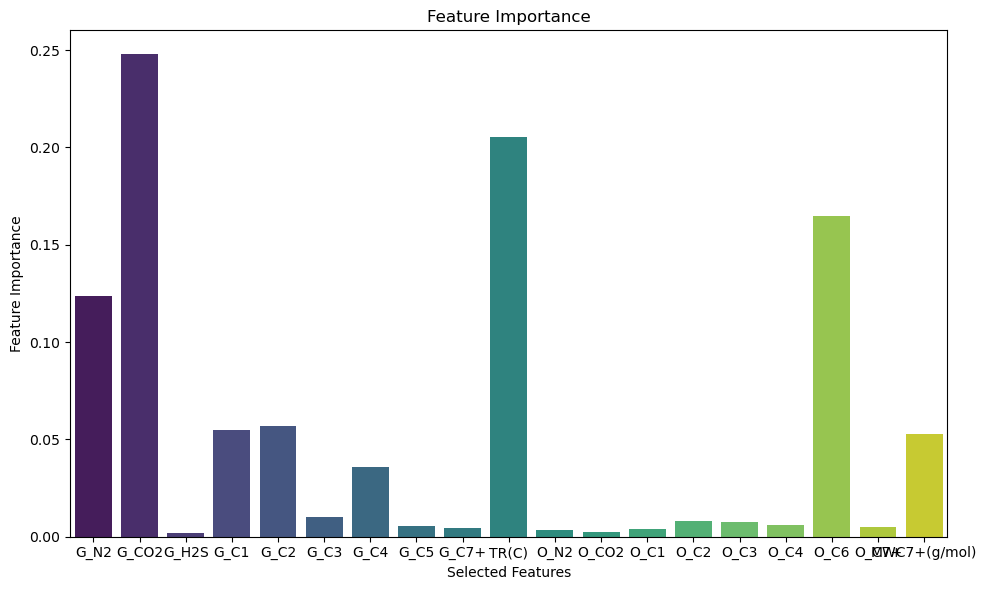

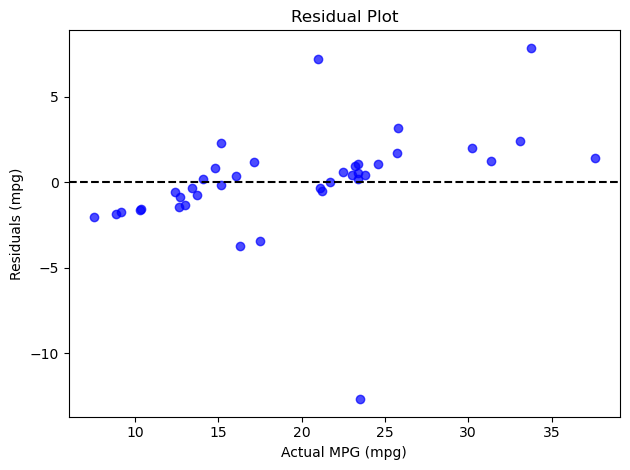

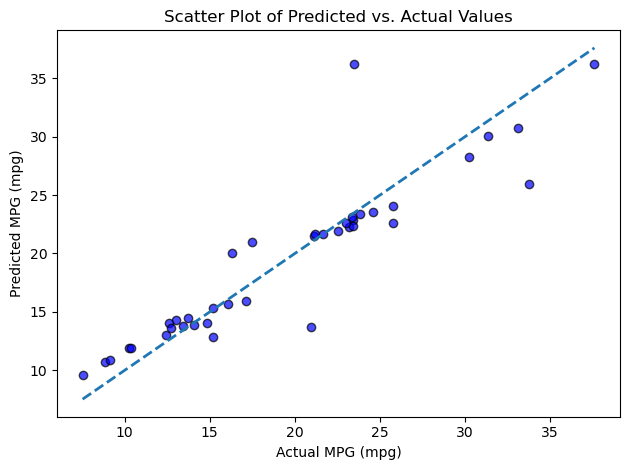

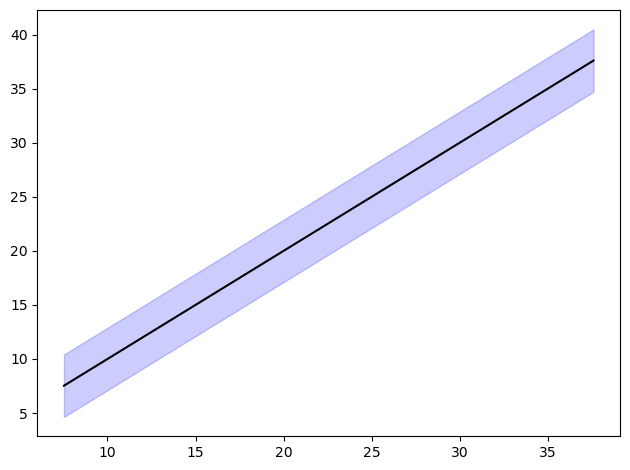

In [59]:
#Visualization of reports
 
 
# Feature Importances Plot
feature_importances = model_rf_tuned_best.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=selected_features, y=feature_importances, palette='viridis')
plt.xlabel("Selected Features")
plt.ylabel("Feature Importance")
plt.title("Feature Importance")
plt.tight_layout()
plt.show()
 
# Residual Plot
residuals = y_test - y_test_pred
plt.scatter(y_test, residuals, alpha=0.7, color='b')
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel("Actual MPG (mpg)")
plt.ylabel("Residuals (mpg)")
plt.title("Residual Plot")
plt.tight_layout()
plt.show()
 
# Scatter Plot of Predicted vs. Actual Values with Confidence Interval
plt.scatter(y_test, y_test_pred, alpha=0.7, color='b', edgecolors='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="--", linewidth=2)
plt.xlabel("Actual MPG (mpg)")
plt.ylabel("Predicted MPG (mpg)")
plt.title("Scatter Plot of Predicted vs. Actual Values")
plt.tight_layout()
plt.show()
 
# Residuals +/- 1 standard deviation of residuals
std_residuals = np.std(residuals)
 
# Plot confidence zone around the fitted line
x_line = np.linspace(min(y_test), max(y_test), 100)
y_line = x_line
y_upper = y_line + 0.95 * std_residuals
y_lower = y_line - 0.95 * std_residuals
plt.plot(x_line, y_line, color='k')
plt.fill_between(x_line, y_lower, y_upper, alpha=0.2, color='b')
plt.tight_layout()
plt.show()



In this case, there is ot need to perform additional hyperparameter tuning to avoid overfitting the parameters and their values.
 
This diagram provides insights into the model’s performance and correlation.
